In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('run_ten_test.csv')

In [3]:
df.tail()

,created_at,to_timestamp,obs_time,job_no,plant_type,mix_id,target_tph,act_pom_tph,agg_wb_tph,rec_wb_tph,...,mix_ten_alert,plant_status,ac_temp_alert,agg_temp_alert,mix_temp_alert,drum_shell_temp_alert,bh_exhaust_temp_alert,bh_inlet_stk_temp_alert,fuel2_oil_temp_alert,plant_stable
13745,1684778334122,2023-05-22 00:10:47,1684735847000,09-023,TCII,DA5C198960,200.0,197.63,161.04,17.63,...,G,P,G,G,G,G,G,Y,G,S
13746,1684778334122,2023-05-22 00:20:47,1684736447000,09-023,TCII,DA5C198960,200.0,196.42,164.20,18.79,...,G,P,G,G,G,G,G,G,G,S
13747,1684778334122,2023-05-22 00:30:47,1684737047000,09-023,TCII,DA5C198960,200.0,204.74,171.25,18.58,...,G,P,G,G,G,G,G,G,G,S
13748,1684778334122,2023-05-22 00:40:47,1684737647000,09-023,TCII,DA5C198960,200.0,201.14,159.09,18.18,...,G,P,G,G,G,G,G,Y,G,S
13749,1684778334122,2023-05-22 00:50:47,1684738247000,09-023,TCII,DA5C198960,200.0,199.33,160.15,16.39,...,G,P,G,G,G,G,G,G,G,S


In [4]:
df1 = df.set_index(pd.DatetimeIndex(df['to_timestamp'])).drop('to_timestamp',axis=1)

In [5]:
df1.tail()

,created_at,obs_time,job_no,plant_type,mix_id,target_tph,act_pom_tph,agg_wb_tph,rec_wb_tph,ac_tph,...,mix_ten_alert,plant_status,ac_temp_alert,agg_temp_alert,mix_temp_alert,drum_shell_temp_alert,bh_exhaust_temp_alert,bh_inlet_stk_temp_alert,fuel2_oil_temp_alert,plant_stable
to_timestamp,,,,,,,,,,,,,,,,,,,,,
2023-05-22 00:10:47,1684778334122,1684735847000,09-023,TCII,DA5C198960,200.0,197.63,161.04,17.63,9.99,...,G,P,G,G,G,G,G,Y,G,S
2023-05-22 00:20:47,1684778334122,1684736447000,09-023,TCII,DA5C198960,200.0,196.42,164.20,18.79,10.01,...,G,P,G,G,G,G,G,G,G,S
2023-05-22 00:30:47,1684778334122,1684737047000,09-023,TCII,DA5C198960,200.0,204.74,171.25,18.58,10.59,...,G,P,G,G,G,G,G,G,G,S
2023-05-22 00:40:47,1684778334122,1684737647000,09-023,TCII,DA5C198960,200.0,201.14,159.09,18.18,10.59,...,G,P,G,G,G,G,G,Y,G,S
2023-05-22 00:50:47,1684778334122,1684738247000,09-023,TCII,DA5C198960,200.0,199.33,160.15,16.39,10.35,...,G,P,G,G,G,G,G,G,G,S


In [6]:
df1 = df1[['drum_shell_temp']]

In [7]:
df_hour = df1.resample('H').mean().ffill()

In [8]:
df_hour.head()

,drum_shell_temp
to_timestamp,
2023-01-10 06:00:00,53.78
2023-01-10 07:00:00,53.39
2023-01-10 08:00:00,53.42
2023-01-10 09:00:00,57.14
2023-01-10 10:00:00,63.20


In [10]:
df_hour.isnull().sum()

drum_shell_temp    0
dtype: int64

In [11]:
df_hour.index

DatetimeIndex(['2023-01-10 06:00:00', '2023-01-10 07:00:00',
               '2023-01-10 08:00:00', '2023-01-10 09:00:00',
               '2023-01-10 10:00:00', '2023-01-10 11:00:00',
               '2023-01-10 12:00:00', '2023-01-10 13:00:00',
               '2023-01-10 14:00:00', '2023-01-10 15:00:00',
               ...
               '2023-05-21 15:00:00', '2023-05-21 16:00:00',
               '2023-05-21 17:00:00', '2023-05-21 18:00:00',
               '2023-05-21 19:00:00', '2023-05-21 20:00:00',
               '2023-05-21 21:00:00', '2023-05-21 22:00:00',
               '2023-05-21 23:00:00', '2023-05-22 00:00:00'],
              dtype='datetime64[ns]', name='to_timestamp', length=3163, freq='H')

<Axes: xlabel='to_timestamp'>

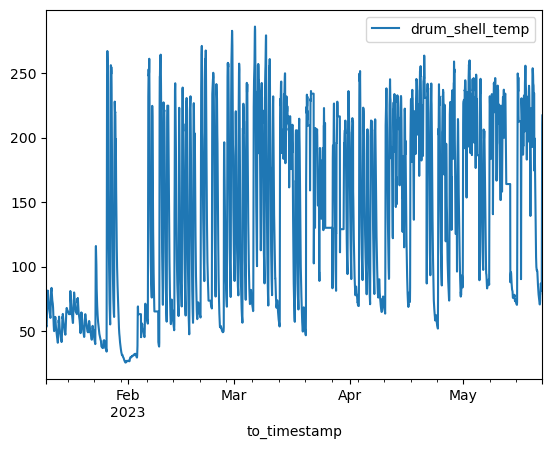

In [12]:
df_hour.plot()

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df_hour).reshape(-1,1))

In [15]:
df1

array([[0.10832278],
       [0.10682629],
       [0.10694141],
       ...,
       [0.60174974],
       [0.70818464],
       [0.73569702]])

In [16]:
training_size  = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data =  df1[0:training_size,:]
test_data = df1[training_size:len(df1),:1]

In [17]:
train_data.shape

(2214, 1)

In [18]:
test_data.shape

(949, 1)

In [19]:
def create_dataset(dataset,timeStep=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-timeStep-1):
        a = dataset[i:(i+timeStep),0]
        dataX.append(a)
        b = dataset[i+timeStep,0]
        dataY.append(b)
    return np.array(dataX),np.array(dataY)

In [20]:
X_train,y_train = create_dataset(train_data,7)
X_test,y_test = create_dataset(test_data,7)

In [21]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2206, 7) (2206,) (941, 7) (941,)


In [22]:
X_train[0]

array([0.10832278, 0.10682629, 0.10694141, 0.12121561, 0.14446875,
       0.16403822, 0.18533441])

In [23]:
## reshape into be like [samples,timeStep,features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
X_train.shape

(2206, 7, 1)

In [25]:
## create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (7,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer=Adam())

2023-05-27 20:33:56.939716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-27 20:33:56.940100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=200,verbose=1)

Epoch 1/200


2023-05-27 20:33:57.455537: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-27 20:33:58.678685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:33:58.959145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:33:59.026773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:33:59.082457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:33:59.207625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:33:59.313050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114]

35/35 [==============================] - ETA: 0s - loss: 0.0712

2023-05-27 20:34:00.520637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:34:00.618514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:34:00.656810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:34:00.701292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 3s 41ms/step - loss: 0.0712 - val_loss: 0.0260
Epoch 2/200
35/35 [==============================] - 1s 23ms/step - loss: 0.0367 - val_loss: 0.0265
Epoch 3/200
35/35 [==============================] - 1s 22ms/step - loss: 0.0341 - val_loss: 0.0235
Epoch 4/200
35/35 [==============================] - 1s 22ms/step - loss: 0.0308 - val_loss: 0.0177
Epoch 5/200
35/35 [==============================] - 1s 22ms/step - loss: 0.0203 - val_loss: 0.0379
Epoch 6/200
35/35 [==============================] - 1s 22ms/step - loss: 0.0159 - val_loss: 0.0115
Epoch 7/200
35/35 [==============================] - 1s 22ms/step - loss: 0.0133 - val_loss: 0.0149
Epoch 8/200
35/35 [==============================] - 1s 22ms/step - loss: 0.0120 - val_loss: 0.0154
Epoch 9/200
35/35 [==============================] - 1s 22ms/step - loss: 0.0108 - val_loss: 0.0087
Epoch 10/200
35/35 [==============================] - 1s 22ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 11/20

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2023-05-27 20:36:58.624856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:36:58.718467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:36:58.755829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-27 20:36:58.801320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 7ms/step


In [30]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
train_predict

array([[ 78.34329],
       [ 78.12329],
       [ 71.17625],
       ...,
       [118.4003 ],
       [197.05263],
       [222.36089]], dtype=float32)

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.05920835321973

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))

182.24689030896997

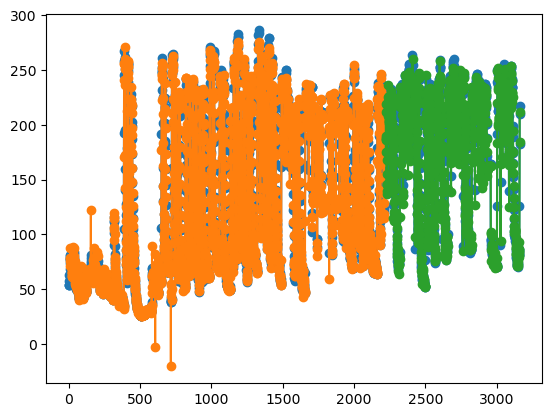

In [51]:
## plotting
# shift train prediction for plotting
import matplotlib.pyplot as plt
look_back = 7
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1),'-o')
plt.plot(trainPredictPlot,'-o')
plt.plot(testPredictPlot,'-o')
plt.show()


In [35]:
len(test_data)

949

In [36]:
x_input = test_data[(len(test_data)-look_back):].reshape(1,-1)

In [37]:
x_input.shape

(1, 7)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [39]:
temp_input

[0.21653044779555664,
 0.21413606538505814,
 0.21330724070450102,
 0.38620927823184076,
 0.6017497409922875,
 0.708184643720502,
 0.7356970185334409]

In [40]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=7
i=0
while(i<10):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7487564]
8
1 day input [0.21413607 0.21330724 0.38620928 0.60174974 0.70818464 0.73569702
 0.74875641]
1 day output [[0.7583108]]
2 day input [0.21330724 0.38620928 0.60174974 0.70818464 0.73569702 0.74875641
 0.75831079]
2 day output [[0.7620124]]
3 day input [0.38620928 0.60174974 0.70818464 0.73569702 0.74875641 0.75831079
 0.76201242]
3 day output [[0.75426435]]
4 day input [0.60174974 0.70818464 0.73569702 0.74875641 0.75831079 0.76201242
 0.75426435]
4 day output [[0.7324489]]
5 day input [0.70818464 0.73569702 0.74875641 0.75831079 0.76201242 0.75426435
 0.73244888]
5 day output [[0.7002038]]
6 day input [0.73569702 0.74875641 0.75831079 0.76201242 0.75426435 0.73244888
 0.70020378]
6 day output [[0.66213745]]
7 day input [0.74875641 0.75831079 0.76201242 0.75426435 0.73244888 0.70020378
 0.66213745]
7 day output [[0.6208146]]
8 day input [0.75831079 0.76201242 0.75426435 0.73244888 0.70020378 0.66213745
 0.62081462]
8 day output [[0.5778276]]
9 day input [0.76201242 0.754264

In [41]:
day_new=np.arange(1,8)
day_pred=np.arange(8,18)

In [42]:
day_new=np.arange(1,8)
day_pred=np.arange(8,18)

In [43]:
import matplotlib.pyplot as plt
len(df1)

3163

In [44]:
3163-7

3156

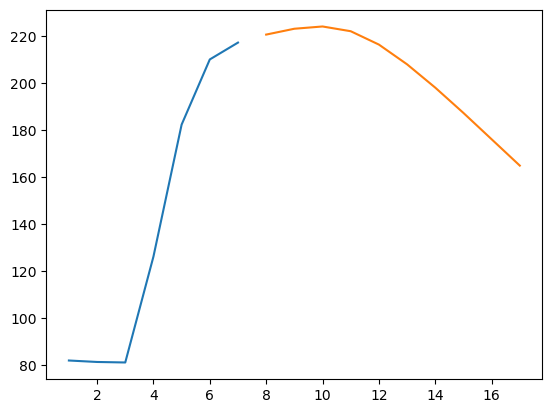

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[3156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

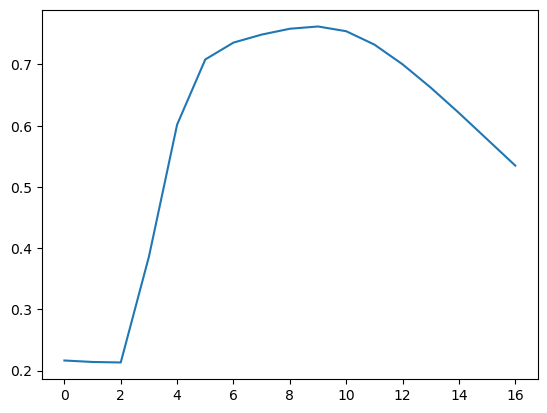

In [46]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3156:])

In [49]:
df3

[[53.78],
 [53.39000000000001],
 [53.419999999999995],
 [57.13999999999999],
 [63.199999999999996],
 [68.3],
 [73.85000000000001],
 [77.288],
 [76.52],
 [81.38],
 [79.76],
 [78.15200000000002],
 [75.83],
 [73.904],
 [72.29],
 [70.67],
 [69.92],
 [69.08000000000001],
 [67.568],
 [66.29],
 [65.33],
 [64.22],
 [62.99000000000001],
 [62.06000000000001],
 [61.16],
 [60.44],
 [60.199999999999996],
 [64.22],
 [71.92999999999999],
 [78.26],
 [82.58],
 [82.535],
 [81.26],
 [83.48],
 [81.8],
 [79.16],
 [77.12],
 [75.47],
 [73.76],
 [73.07000000000001],
 [72.23],
 [71.24],
 [70.01],
 [67.91000000000001],
 [64.22],
 [60.71000000000001],
 [57.26],
 [54.47],
 [52.088],
 [50.15],
 [49.928],
 [51.199999999999996],
 [52.60999999999999],
 [56.75],
 [58.34],
 [59.75],
 [58.892],
 [60.980000000000004],
 [58.91],
 [56.419999999999995],
 [54.620000000000005],
 [53.449999999999996],
 [52.28],
 [51.007999999999996],
 [49.91],
 [48.71],
 [47.66],
 [46.669999999999995],
 [45.59],
 [44.63],
 [43.76],
 [42.74],
 

In [47]:
df3=scaler.inverse_transform(df3).tolist()

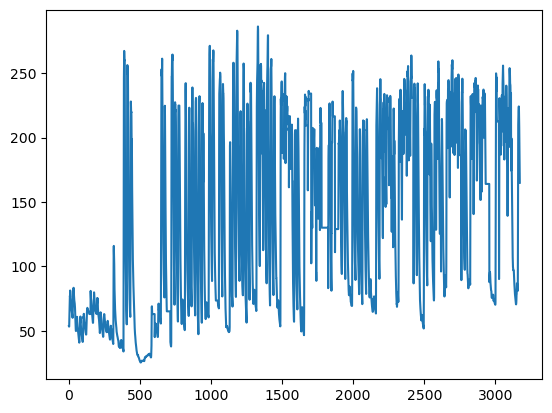

In [48]:
plt.plot(df3)